### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

Information regarding the features for the data are located in the `Column` section on the website.

Some code inspiration for this analysis was sourced from [this noteboook](https://www.kaggle.com/dimitriirfan/market-eda).

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inspect
import re
import missingno as msno
import cv2
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway, ttest_ind, levene, pointbiserialr, pearsonr
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from pingouin import welch_anova


%matplotlib inline

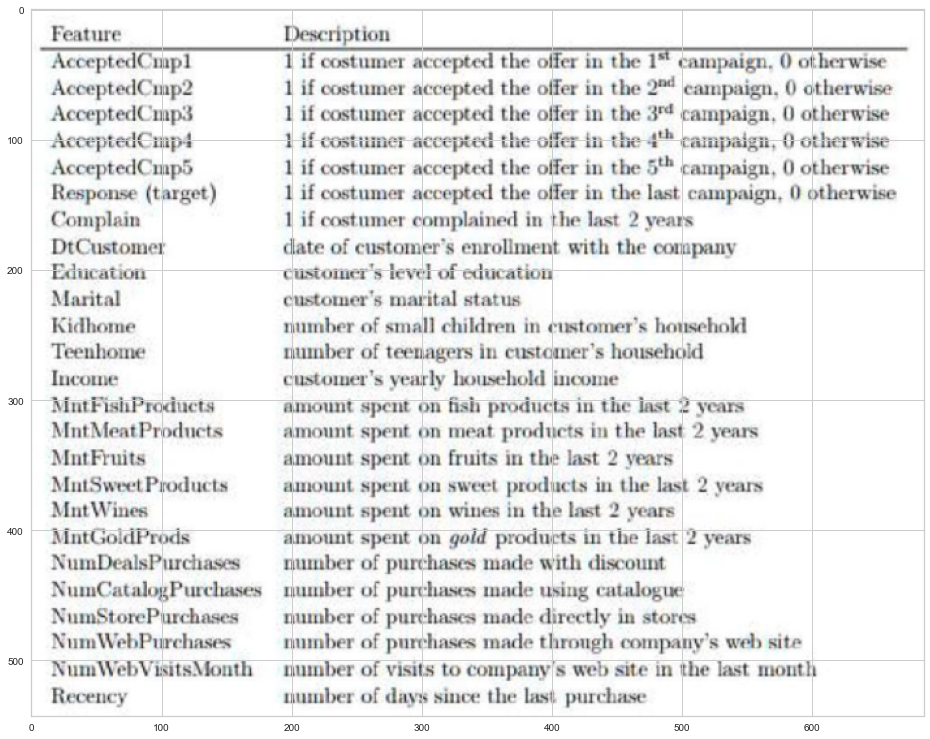

In [2]:
img = cv2.imread('columns_meaning.png')
plt.figure(figsize = (16,15))
plt.imshow(img)

In [3]:
dir_data = glob.glob('data\*.csv')
dir_data

['data\\marketing_data.csv']

In [4]:
df = pd.read_csv(dir_data[0])

# Preprocessing

#### Handling missing data 

In [5]:
df.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
df.columns

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

<AxesSubplot:>

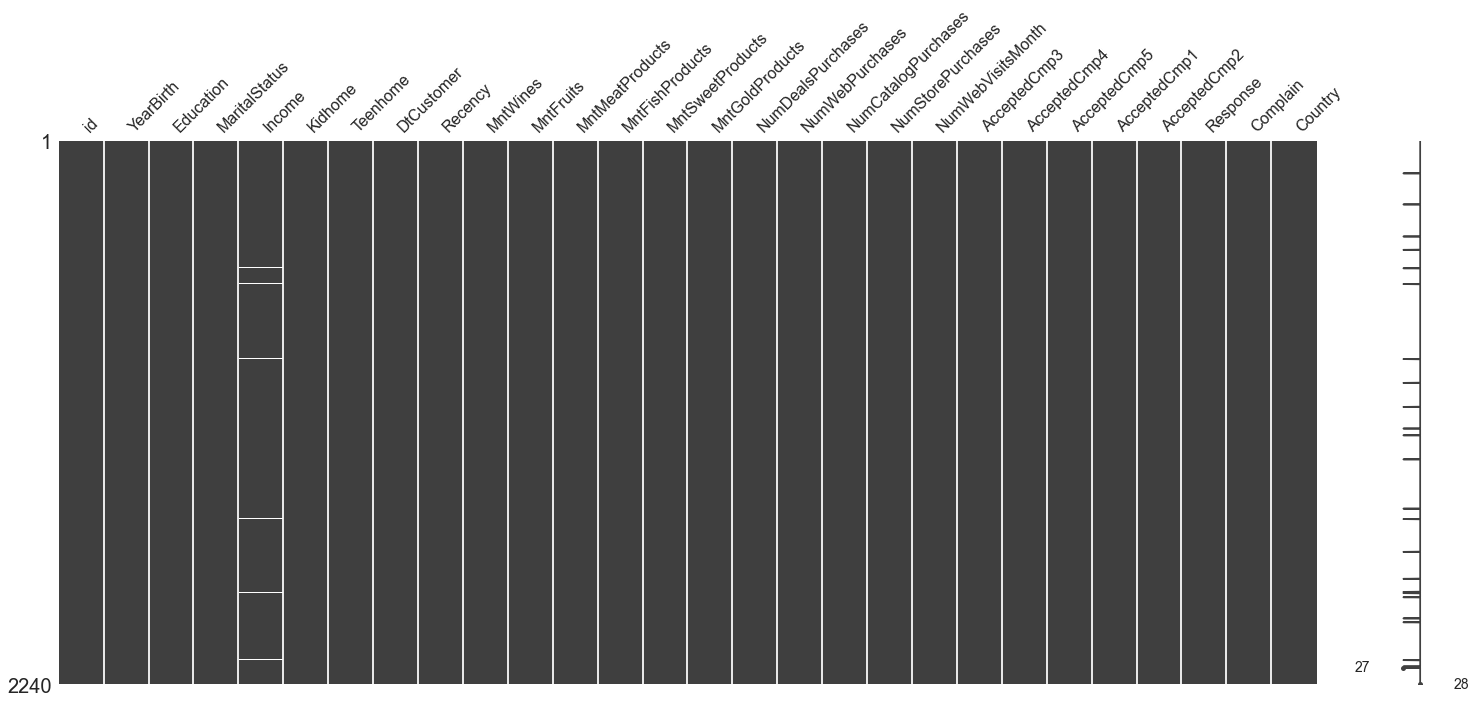

In [7]:
msno.matrix(df) #just Income column has missing values

#### Inspect `Income`

In [8]:
null_income = df[df.Income.isnull()].copy()
null_income.head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA


In [9]:
null_income.Education.unique()

array(['PhD', 'Graduation', '2n Cycle', 'Master'], dtype=object)

In [10]:
df.Income[:5]

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object

In [11]:
df.Income = df.Income.str.replace('$','')
df.Income = df.Income.str.replace(',','')
df.Income = pd.to_numeric(df.Income)

In [12]:
df.Income[:5]

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

#### I could replace null values by the mean of `Income`. However, I think that at different `Education` Levels , `Income` is different too. 

Text(0.5, 1.0, 'Income according to Education Level')

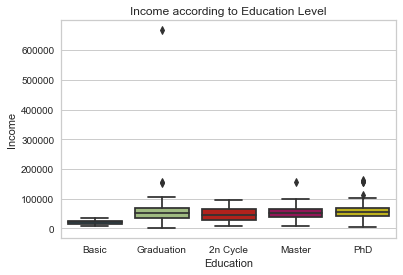

In [13]:
df.Education = pd.Categorical(df.Education, categories=["Basic", "Graduation", "2n Cycle", "Master", "PhD"], ordered=True)
plt.clf()
sns.boxplot(data = df, x = 'Education', y = 'Income')
plt.title('Income according to Education Level')

#### Need removing ouliers

In [14]:
lst = []
for edu in df.Education.unique():
    edu_inc = df[['Education','Income']][df.Education == edu].reset_index(drop = True).copy()
    first = edu_inc.quantile(0.25).values[0]
    third = edu_inc.quantile(0.75).values[0]
    iqr = third - first
    index = edu_inc['Income'][(edu_inc['Income'] >= (first - 1.5*iqr)) & (edu_inc['Income'] <= (third + 1.5*iqr))].index
    lst.append(edu_inc.iloc[index])

In [20]:
sub.head(10)

,Education,Income
0,Graduation,84835.0
1,Graduation,57091.0
2,Graduation,67267.0
3,Graduation,32474.0
4,Graduation,21474.0
5,Graduation,44931.0
6,Graduation,26872.0
7,Graduation,4428.0
8,Graduation,54809.0
9,Graduation,54809.0


#### According to the boxplots, I assume that there should be different *mean* of `Income` between `Education` Levels.
#### Next, I will run ANOVA and Turkey test .

Text(0.5, 1.0, 'Income according to Education Level')

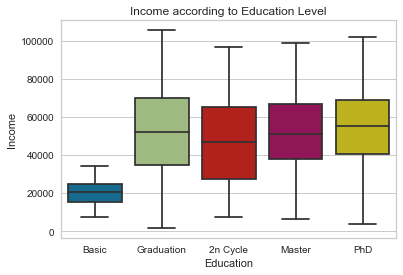

In [15]:
sub = pd.concat(lst)
plt.clf()
sns.boxplot(data = sub, x = 'Education', y = 'Income')
plt.title('Income according to Education Level')

In [16]:
mean_inc_edu = sub.groupby('Education').Income.mean().reset_index()
mean_inc_edu

,Education,Income
0,Basic,20306.259259
1,Graduation,51984.008086
2,2n Cycle,47633.190000
3,Master,52629.579670
4,PhD,55157.132353


In [17]:
sub.isnull().any(axis = 1).value_counts()

False    2207
dtype: int64

In [18]:
sub.dropna(inplace = True)

In [19]:
sub.Education.unique()

['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Categories (5, object): ['Basic' < 'Graduation' < '2n Cycle' < 'Master' < 'PhD']

In [23]:
dic = {}
for edu in sub.Education.unique():
    dic[f'{edu}'] = sub.Income[sub.Education == edu].values


#### Before I use ANOVA test, I need to know whether these samples are qualified for the test.
#### The Levene test with p < 0.05 is True, so Variance between Education levels is not the same. Sadly, I cannot use the ANOVA Test.
#### Alternatively, I 'll perform Welch’s ANOVA

In [24]:

_,pval = levene(dic['Graduation'],dic['Master'],dic['PhD'],dic['2n Cycle'],) # I remove Basic because there is no null values of it.
pval < .05


True

In [22]:
welch_anova(data = df[df.Education != 'Basic'], dv = 'Income', between = 'Education')

,Source,ddof1,ddof2,F,p-unc,np2
0,Education,3,711.752515,7.612053,0.000051,0.007884


#### P-value < 0.05. Therefore, I continue to replace null income with the mean income of each Education Levels they belong.

In [23]:
for edu in null_income.Education.unique():
    df.Income.loc[(df.Education == edu)&(df.Income.isnull())] = mean_inc_edu.Income[mean_inc_edu.Education == edu].values[0]
    

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
df.info() #No null at all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   2240 non-null   int64   
 1   YearBirth            2240 non-null   int64   
 2   Education            2240 non-null   category
 3   MaritalStatus        2240 non-null   object  
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   DtCustomer           2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProducts      2240 non-null   int64   
 15  NumDealsPurchases    

#### Handling duplicates Items

In [25]:
df.duplicated().value_counts()

False    2240
dtype: int64

In [26]:
df.id.duplicated().value_counts()

False    2240
Name: id, dtype: int64

#### Marital status confused couple: (Married, Together) & (Single, Yolo, Alone) 

In [27]:
df.MaritalStatus.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

#### Because data author haven't explained what are YoLo, Alone and Absurb so I will replace them by my own Idea
#### Yolo and Alone seemed to be belonged to Divorce because they have child at home but Absurb. Therefore, I will turn Absurb into Single.


In [28]:
df[df.MaritalStatus.isin(['Absurd','Alone','YOLO'])]

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
103,492,1973,PhD,YOLO,48432.0,0,1,10/18/12,3,322,...,6,8,0,0,0,0,0,0,0,CA
104,11133,1973,PhD,YOLO,48432.0,0,1,10/18/12,3,322,...,6,8,0,0,0,0,0,1,0,IND
286,92,1988,Graduation,Alone,34176.0,1,0,5/12/14,12,5,...,4,6,0,0,0,0,0,0,0,CA
838,7660,1973,PhD,Alone,35860.0,1,1,5/19/14,37,15,...,2,5,1,0,0,0,0,1,0,CA
959,433,1958,Master,Alone,61331.0,1,1,3/10/13,42,534,...,6,8,0,0,0,0,0,0,0,CA
1068,4369,1957,Master,Absurd,65487.0,0,0,1/10/14,48,240,...,6,2,0,0,0,0,0,0,0,CA
1339,7734,1993,Graduation,Absurd,79244.0,0,0,12/19/12,58,471,...,7,1,0,0,1,1,0,1,0,AUS


In [29]:
df.MaritalStatus.replace('Absurd', 'Single', inplace = True)
df.MaritalStatus.replace(['YOLO','Alone'], 'Divorced', inplace = True)

#### Take a look at *Together* `MaritalStatus`

In [30]:
df[df.MaritalStatus == 'Together'].head()

,id,YearBirth,Education,MaritalStatus,Income,Kidhome,Teenhome,DtCustomer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
11,5642,1979,Master,Together,62499.0,1,0,12/9/13,0,140,...,6,4,0,0,0,0,0,0,0,SP
20,2285,1954,Master,Together,36634.0,0,1,5/28/13,0,213,...,5,7,0,0,0,0,0,0,0,SA
26,5430,1956,Graduation,Together,54450.0,1,1,9/14/12,0,454,...,8,8,0,0,0,0,0,0,0,SP


In [31]:
df.MaritalStatus[(df.Kidhome != 0) | (df.Teenhome != 0)].unique()

array(['Married', 'Together', 'Single', 'Divorced', 'Widow'], dtype=object)

In [32]:
df['Childhome'] = (df.Teenhome + df.Kidhome) > 0

In [33]:
df.Childhome.sum()/len(df) *100

71.51785714285714

In [34]:
df.Childhome[df.MaritalStatus == 'Married'].sum()

634

In [35]:
df.Childhome[df.MaritalStatus == 'Together'].sum()

426

#### I think *Married* and *Together* are the same

In [36]:
df.MaritalStatus.replace('Together', 'Married', inplace = True)

In [37]:
df.MaritalStatus.unique()

array(['Divorced', 'Single', 'Married', 'Widow'], dtype=object)

#### Creating `CustomerAge`. Grouping **Age** and **Income** for futher analysis

In [38]:
df['CustomerAge'] = 2021 - df.YearBirth

In [39]:
# function that breaks up each age into a group
def age_groups(age):
    if 18 <= age <= 35 : 
        return '18 to 35' 
    elif 35 < age <= 50 : 
        return '36 to 50'
    elif 50 < age <= 70 : 
        return '51 to 70'
    else : 
        return '71 and Older'
    
df['age_group'] = df.CustomerAge.apply(age_groups)

In [40]:
df['income_group'] = pd.qcut(df.Income,4)

# Analysis

### Puchase Behavior versus Income

In [41]:
p = re.compile(r'\w+(Purchases)')
purchase_list = [i for i in df.columns if p.match(i)]
purchase_list

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

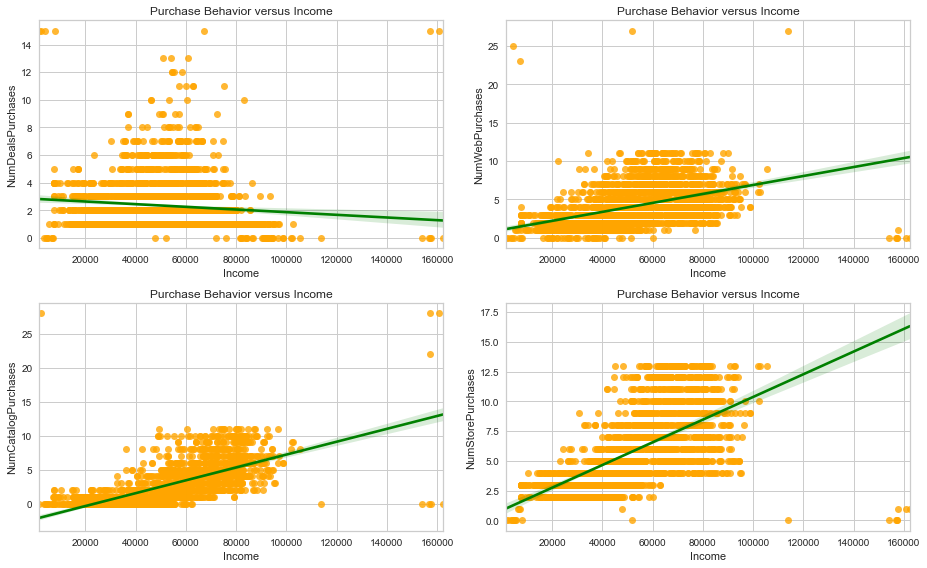

In [42]:
plot = 0
fig = plt.figure(figsize = (13,8))
for i in range(4):
    plot+=1
    ax = plt.subplot(2,2,plot)
    sns.regplot(data = df[df.Income < df.Income.max()], #remove this rich guy to make better plot
                x = 'Income', 
                y = purchase_list[i], 
                scatter_kws={'color': 'orange'}, 
                line_kws = {'color': 'green'})
    plt.title('Purchase Behavior versus Income')
plt.tight_layout()
plt.show()

It looks like more income people make more purchases. But `NumDealPurchases`, richer customers seems not to be interested with deals. Beside that, customers with higher Income would prefer to take stuff directly from store.

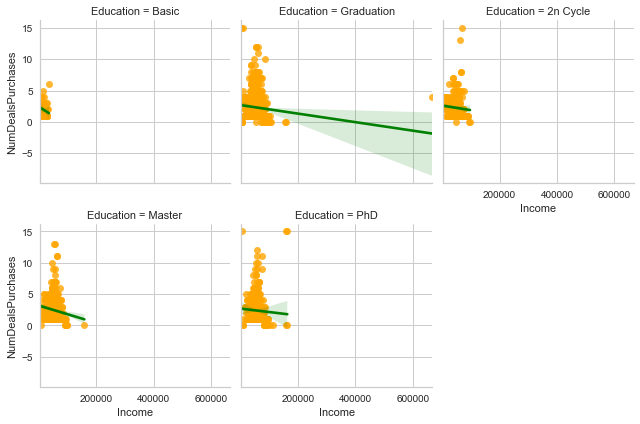

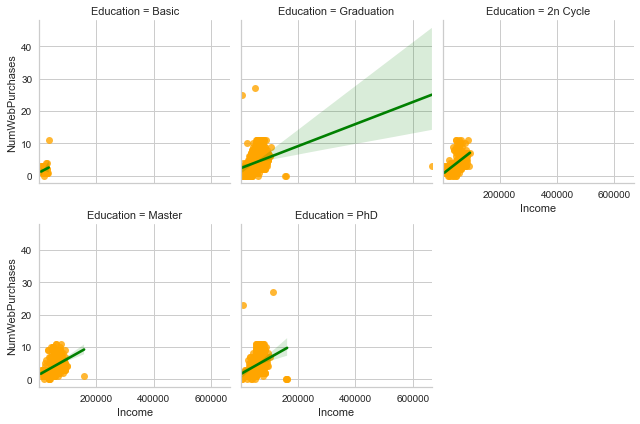

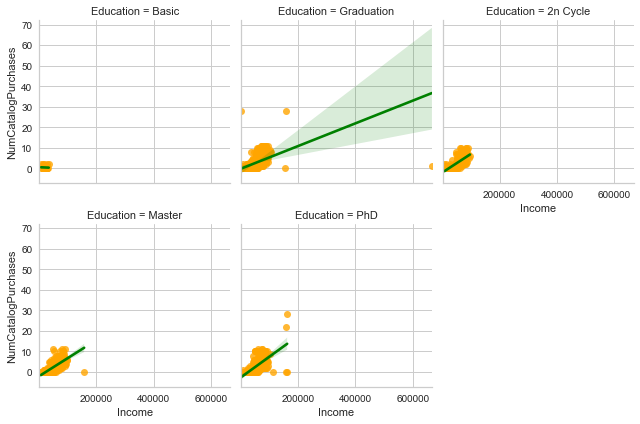

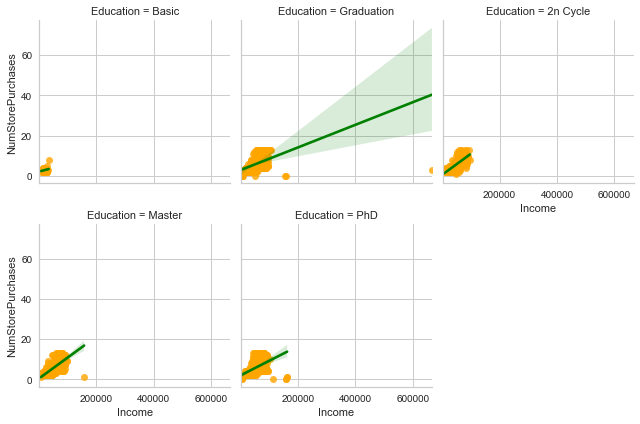

In [43]:
# dictionary used to contain dynamic variables
variable_names = {}
#amounts columns list
#amounts_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(4):
    # defining the facet grid
    variable_names["g{0}".format(i)] = sns.FacetGrid(df, col="Education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    variable_names["g{0}".format(i)].map(sns.regplot, "Income", 
                                         purchase_list[i],
                                         scatter_kws={'color': 'orange'}, 
                                         line_kws = {'color': 'green'})
    plt.tight_layout()
plt.show()

## Purchase Behavior versus Income Group

#### I divide data in 4 groups with equal population

<AxesSubplot:xlabel='income_group', ylabel='count'>

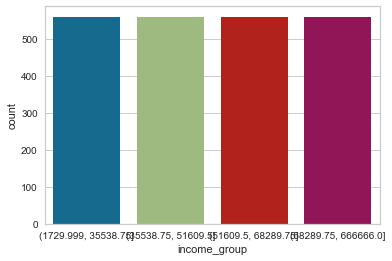

In [44]:
sns.countplot(data = df, x = 'income_group')

<AxesSubplot:xlabel='income_group'>

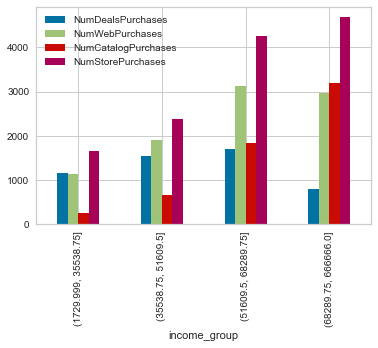

In [45]:
purchase_income_group = df[['income_group'] + purchase_list].groupby('income_group').sum().reset_index()
purchase_income_group.plot(x = 'income_group', y = purchase_list, kind = 'bar')

When Income_group is being higher, number of Purchases goes up too. However, `NumDealsPurchases` shows some reluctance.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

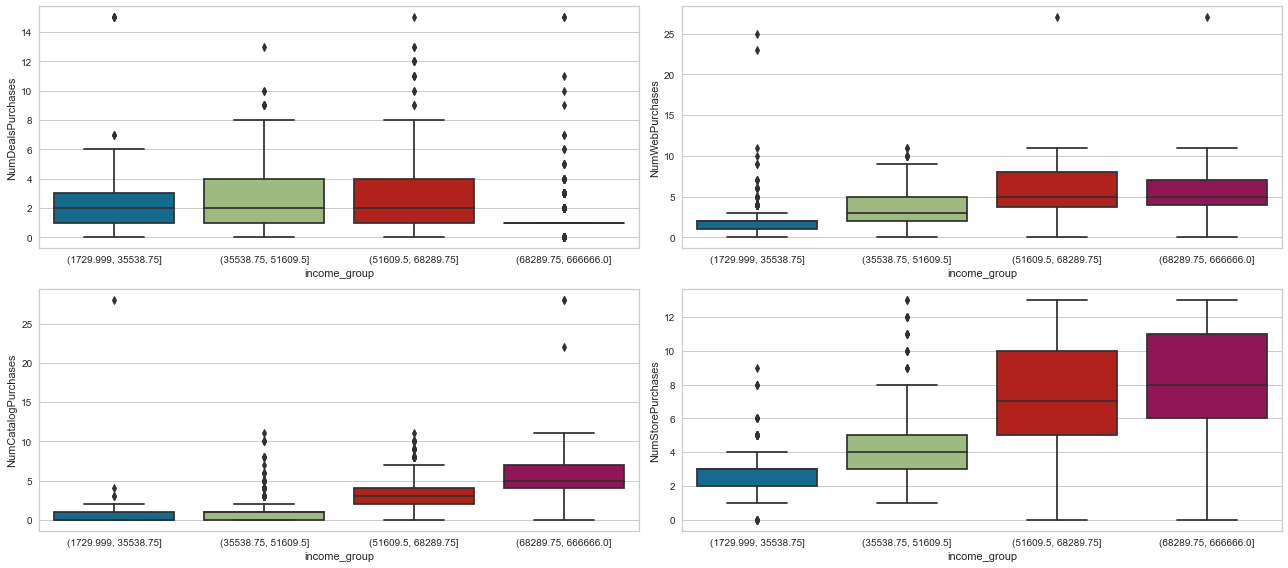

In [94]:
plt.clf()
plot = 0
fig = plt.figure(figsize = (18,8))
for i in range(4):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.boxplot(data = df[df.Income < df.Income.max()], 
                x = 'income_group', y = purchase_list[i], 
                order=np.sort(df.income_group.unique()))
plt.tight_layout()
plt.show()

* `1730 to 35538` customers don't buy much at this store.
* `68290 and higher` customers shows minimum interest with deals. But two middle income level is contrast.
* `51609 to 68289` customers purchase most from the store website.

#### For better `Income` grouping, I'll use K-means Cluster

In [47]:
p = re.compile('(Mnt)\w+')
mnt_list = [i for i in df.columns if p.match(i)]
mnt_list

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProducts']

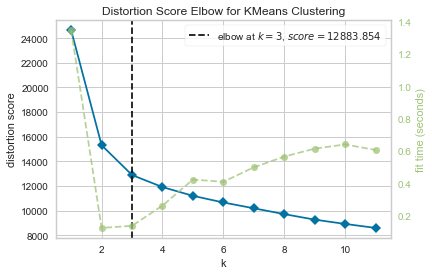

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
scaler = StandardScaler()
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = (1,12))
visualizer.fit(scaler.fit_transform(df[['Income'] + purchase_list + mnt_list]))
visualizer.show()

In [49]:
kmeans = KMeans(n_clusters = 3, random_state=42).fit(scaler.fit_transform(df[['Income'] + purchase_list + mnt_list]))
df['income_group_label'] = kmeans.labels_

#### The segmentation is statistically acceptable since:
* Normal distribution
* Variance is not different
* ANOVA test with p < 0.05

<AxesSubplot:xlabel='Income', ylabel='Density'>

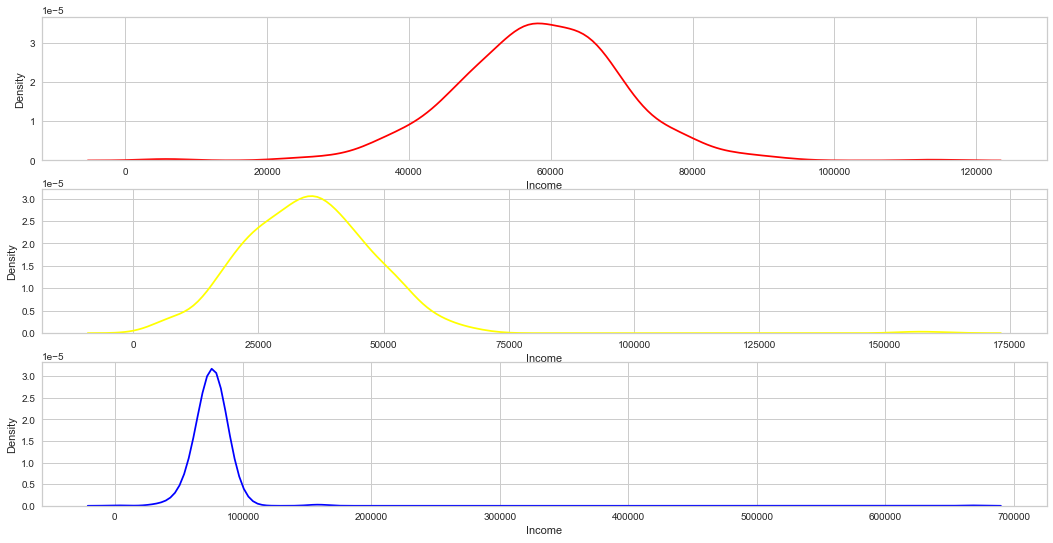

In [50]:
plt.figure(figsize = (18,9))
ax1 = plt.subplot(3,1,1)
sns.kdeplot(data =df[df.income_group_label == 0] , x='Income', color = 'red')

ax2 = plt.subplot(3,1,2)
sns.kdeplot(data =df[df.income_group_label == 1] , x='Income', color = 'yellow')

ax3 = plt.subplot(3,1,3)
sns.kdeplot(data =df[df.income_group_label == 2] , x='Income', color = 'blue')

In [51]:
levene(df.Income[df.income_group_label == 0],df.Income[df.income_group_label == 1],df.Income[df.income_group_label == 2])

LeveneResult(statistic=1.5667291032515014, pvalue=0.20895573665126696)

In [52]:
f_oneway(df.Income[df.income_group_label == 0],df.Income[df.income_group_label == 1],df.Income[df.income_group_label == 2])

F_onewayResult(statistic=995.449154259159, pvalue=6.0410602396594e-310)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Middle'), Text(1, 0, 'Lower'), Text(2, 0, 'Upper')]

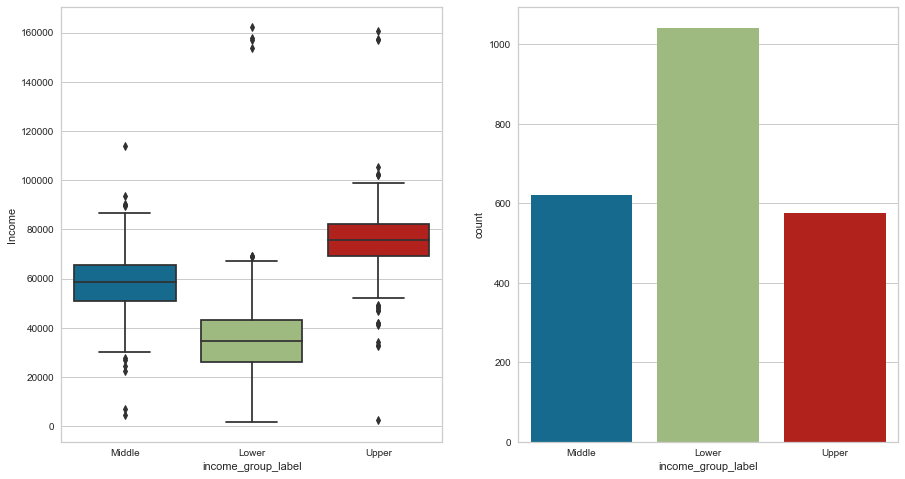

In [53]:
plt.figure(figsize = (15,8))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data = df[df.Income < df.Income.max()], x = 'income_group_label', y = 'Income', ax = ax1)
ax1.set_xticklabels(['Middle','Lower','Upper'])
ax2 = plt.subplot(1,2,2)
sns.countplot(df.income_group_label, ax = ax2)
ax2.set_xticklabels(['Middle','Lower','Upper'])

([<matplotlib.axis.XTick at 0x1f1109d28b0>,
 [Text(0, 0, 'Lower'), Text(1, 0, 'Middle'), Text(2, 0, 'Upper')])

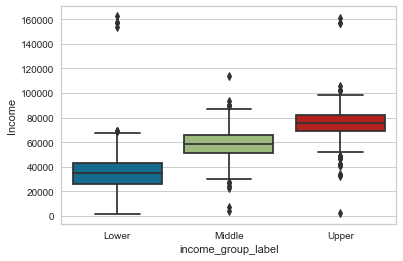

In [54]:
sns.boxplot(data = df[df.Income < df.Income.max()], x = 'income_group_label', y = 'Income', order = [1,0,2])
plt.xticks(ticks = range(3),labels = ['Lower','Middle','Upper'])

In [55]:
df['income_segment'] = ''
df.loc[df.income_group_label == 1, 'income_segment'] = 'Lower'
df.loc[df.income_group_label == 0, 'income_segment'] = 'Middle'
df.loc[df.income_group_label == 2, 'income_segment'] = 'Upper'

<Figure size 432x288 with 0 Axes>

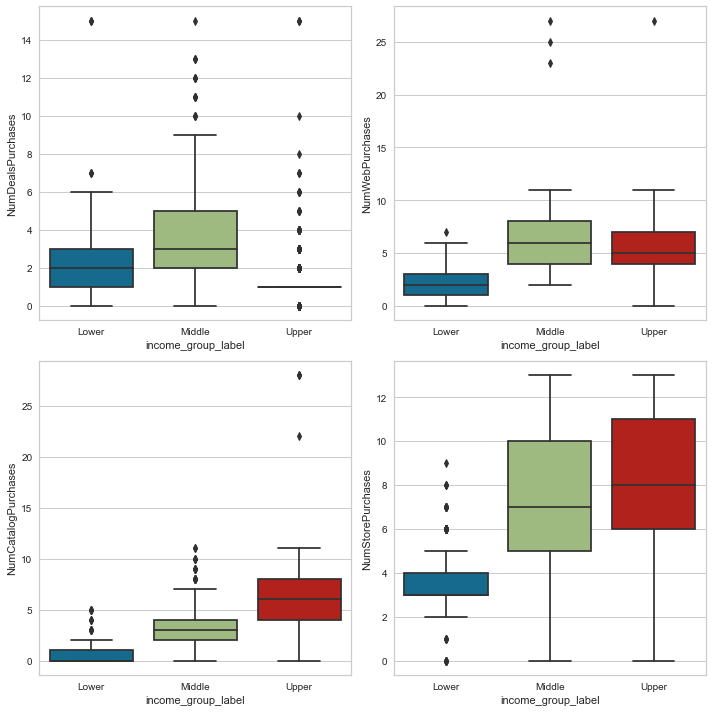

In [56]:
plt.clf()
plot = 0
fig = plt.figure(figsize = (10,10))
for i in range(4):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.boxplot(data = df[df.Income < df.Income.max()], 
                x = 'income_group_label', y = purchase_list[i], 
                order = [1,0,2]
                )
    ax.set_xticklabels(['Lower','Middle','Upper'])
plt.tight_layout()
plt.show()

Just like quartile grouping above but clearer results:
* `Lower` income customers: although they are main customers, they take least purchases.
* `Middle` income customers: These customer is intersted most in Deals and Web.
* `Upper` income customers: They mostly care about Catalog and direct Store purchases.

## Purchase Behavior vesus Age Group

#### I manually segment data into 4 age Group: `18 to 35`, `36 to 50`,`51 to 70`,`71 and Older`.


In [57]:
purchase_age_group = df[['age_group']+purchase_list].groupby('age_group').sum().reset_index()

In [58]:
purchase_age_group

,age_group,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,18 to 35,303,650,514,1056
1,36 to 50,2117,3350,1980,4738
2,51 to 70,2525,4479,2961,6248
3,71 and Older,263,671,508,928


#### The barplot doesn't give any information because its distribution is just like `age_group`.
#### Therefore, I'm using boxplot to analyze it.

<AxesSubplot:xlabel='age_group', ylabel='count'>

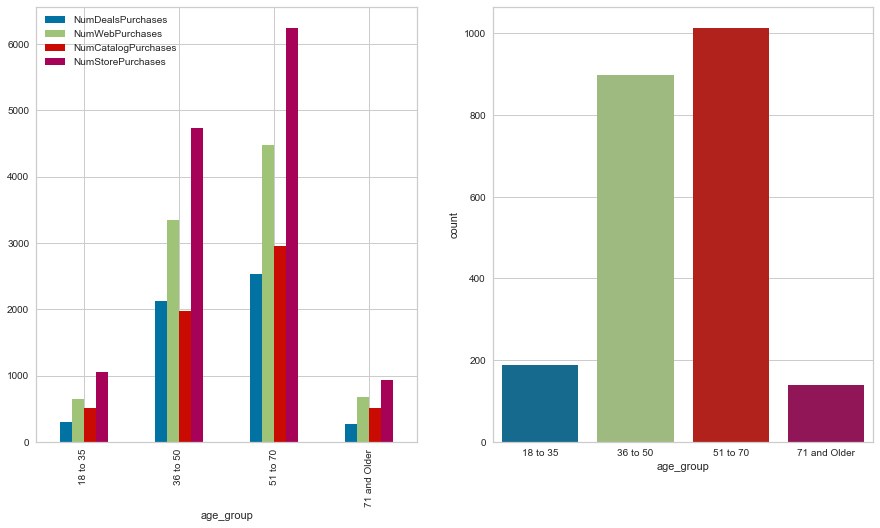

In [125]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))

purchase_age_group.plot( x = 'age_group', y = purchase_list, kind = 'bar', ax = ax1)
sns.countplot(data = df, x = 'age_group', order=np.sort(df.age_group.unique()), ax = ax2)

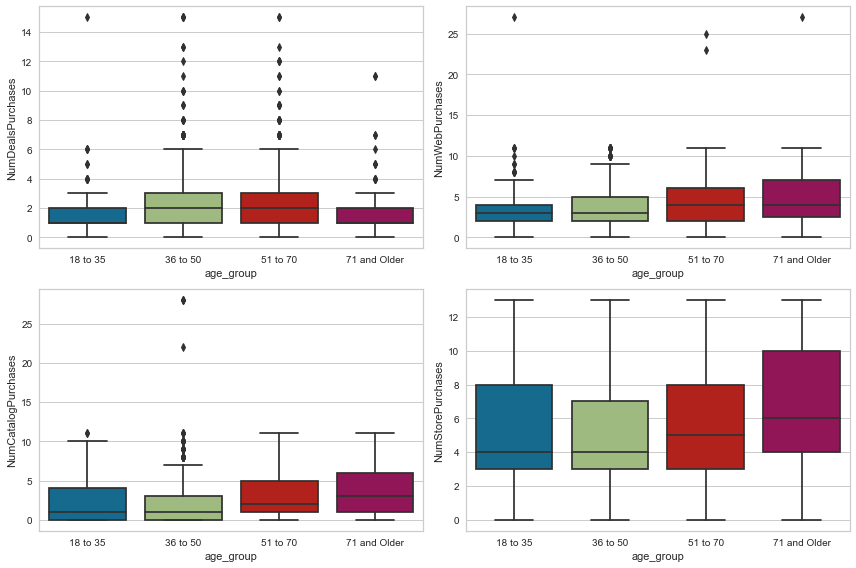

In [61]:
plot = 0
fig = plt.figure(figsize = (12,8))
for i in range(4):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.boxplot(data = df, x = 'age_group', y = purchase_list[i], order=np.sort(df.age_group.unique()))
plt.tight_layout()
plt.show()

Unlike the barplot, this boxplot shows some very interesting insights:
* `36 to 50` and `51 and 70` customers are more attracted to deals, perhaps Loyalty Policy is important to them.
* `71 and Older` customers are interested with any kind of purchases but Deals.
* `18 to 35` customers seemed not to be attracted to any of purchases channel .

#### As we can see, it's difficult to interpet from my manual grouping.
#### Once again K-means

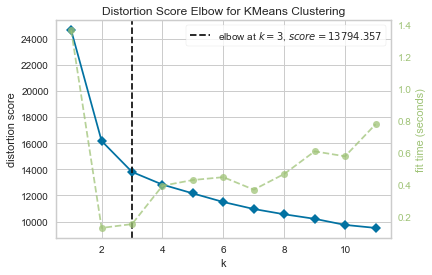

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k = range(1,12))
visualizer.fit(scaler.fit_transform(df[['CustomerAge'] + purchase_list + mnt_list]))
visualizer.show()

In [63]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(scaler.fit_transform(df[['CustomerAge'] + purchase_list + mnt_list]))
df['age_group_label'] = kmeans.labels_

### This segmentation is statistically acceptable.

In [64]:
levene(df[df.age_group_label == 0].CustomerAge, df[df.age_group_label == 1].CustomerAge)

LeveneResult(statistic=26.82827694139391, pvalue=2.5000126420474885e-07)

In [65]:
welch_anova(data = df, dv = 'CustomerAge', between='age_group_label')['p-unc'] < 0.05

0    True
Name: p-unc, dtype: bool

In [66]:
print(pairwise_tukeyhsd(df.CustomerAge, df.age_group_label), 0.05)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -2.739 0.001 -4.1408 -1.3373   True
     0      2    4.285 0.001  2.7126  5.8575   True
     1      2    7.024 0.001  5.6296  8.4184   True
--------------------------------------------------- 0.05


[Text(0, 0, 'Middle Age'), Text(1, 0, 'Younger'), Text(2, 0, 'Older')]

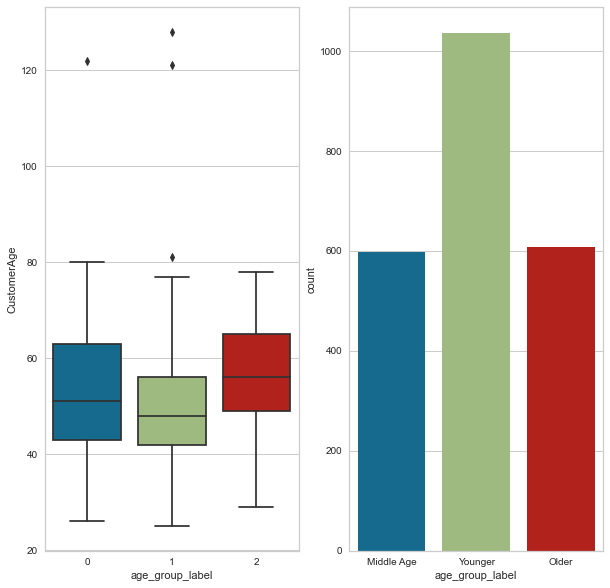

In [67]:
plt.figure(figsize = (10,10))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data = df, x = 'age_group_label', y = 'CustomerAge')
ax2 = plt.subplot(1,2,2)
sns.countplot(data = df, x = 'age_group_label')
ax2.set_xticklabels(['Middle Age','Younger','Older'])

#### *note* : these Age segmentations depend on this store data. For instance, `Middle Age` doesn't mean they are globally middle age but most of them are not too young and too old in this store data.

In [68]:
print('Middle Age',df[df.age_group_label == 0].CustomerAge.quantile([0.05, 0.75]).values, ": Most of this store's middle age people in this age ragne")
print('Younger',df[df.age_group_label ==1].CustomerAge.quantile([0.05, 0.75]).values, ": Most of this store's younger people in this age range")
print('Older',df[df.age_group_label == 2].CustomerAge.quantile([0.05, 0.75]).values,": Most of this store's older people in this age range")

Middle Age [31.8 63. ] : Most of this store's middle age people in this age ragne
Younger [33. 56.] : Most of this store's younger people in this age range
Older [40. 65.] : Most of this store's older people in this age range


([<matplotlib.axis.XTick at 0x1f10d7134c0>,
 [Text(0, 0, 'Younger'), Text(1, 0, 'Middle Age'), Text(2, 0, 'Older')])

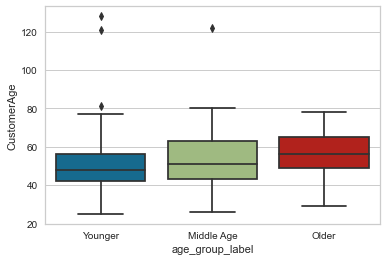

In [69]:
sns.boxplot(data = df, x = 'age_group_label', y = 'CustomerAge', order = [1,0,2])
plt.xticks(ticks = range(3), labels = ['Younger','Middle Age', 'Older'])

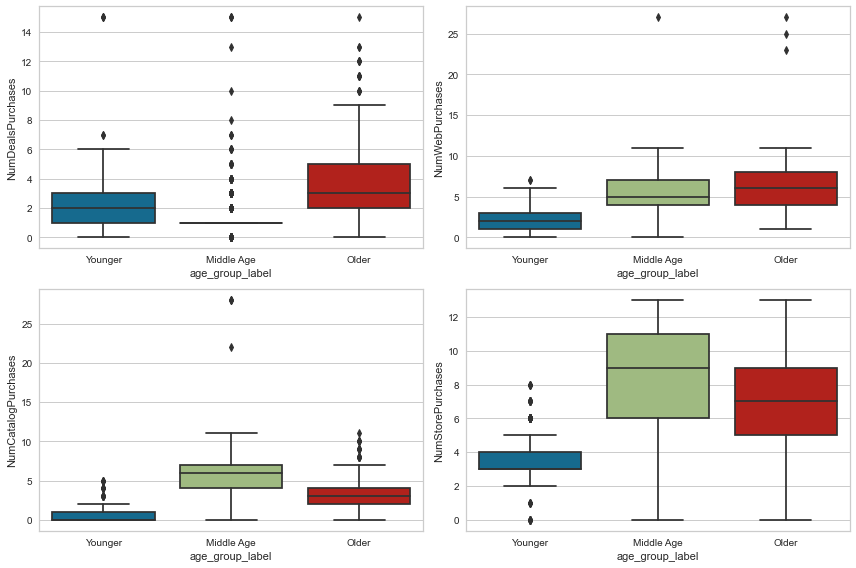

In [70]:
plot = 0
fig = plt.figure(figsize = (12,8))
for i in range(4):
    plot += 1
    ax = plt.subplot(2,2,plot)
    sns.boxplot(data = df, x = 'age_group_label', y = purchase_list[i], order=[1,0,2])
    ax.set_xticklabels(['Younger','Middle Age', 'Older'])
plt.tight_layout()
plt.show()

With K-means Cluster, it's esier to compare between groups:
* `Younger` people seem only interested in Deals.
* `Middle Age` customers buy more with Catalogue and direct Store.
* `Older` suprisingly is most familiar with Deals and Web purchase.

## Campaign acceptance vs Education and Age groups and Income

In [71]:
p = re.compile('\w+(Cmp)\w+')
campaign = [i for i in df.columns if p.match(i)]
campaign

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']

#### Campaign versus Education

In [72]:
df['camp_accp'] =  df[campaign].sum(axis = 1) > 0
df['camp_accp_1'] = df.camp_accp 
camp_accp_groupby = df.groupby(['Education','camp_accp'])['camp_accp_1'].count().reset_index()
df.drop('camp_accp_1',axis = 1, inplace = True)

In [105]:
df.groupby('Education').camp_accp.value_counts().unstack().reset_index()

camp_accp,Education,False,True
0,Basic,48,6
1,Graduation,897,230
2,2n Cycle,165,38
3,Master,295,75
4,PhD,372,114


In [74]:
edu_camp = df[campaign + ['Education']]
edu_camp_melt = edu_camp.melt('Education', var_name='campaign', value_name= 'accepted')
edu_camp_sum = edu_camp_melt.groupby(['Education','campaign'])\
                  .agg({'accepted': 'sum'}).\
                  sort_values(by =['Education','campaign']).reset_index()


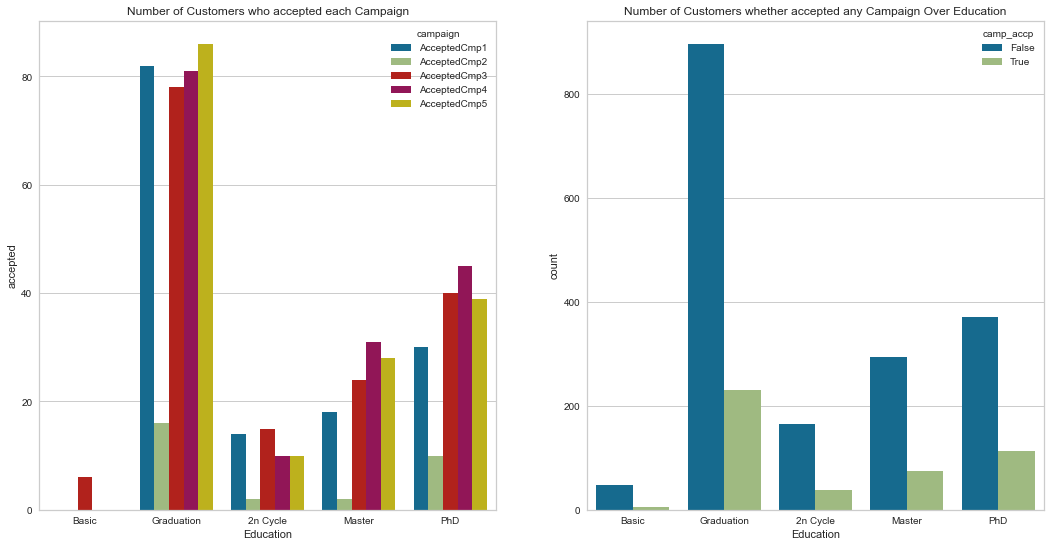

In [75]:
%matplotlib inline
plt.figure(figsize = (18,9))
ax1 = plt.subplot(1,2,1)
sns.barplot(data = edu_camp_sum, x= 'Education', y='accepted', hue = 'campaign')
ax1.set_title('Number of Customers who accepted each Campaign')
ax2 = plt.subplot(1,2,2)
sns.barplot(data = camp_accp_groupby, x = 'Education', y= 'count', hue = 'camp_accp')
ax2.set_title('Number of Customers whether accepted any Campaign Over Education')
plt.show()

From the right plot, I infer that the domination of campaign acceptances of `Graduation` customers are because they are the main consumers of the store. But there are different in kind of campaign acceptances among education level. Next, all of campaigns seemed not to work well in attracting customer, especially `Basic` .

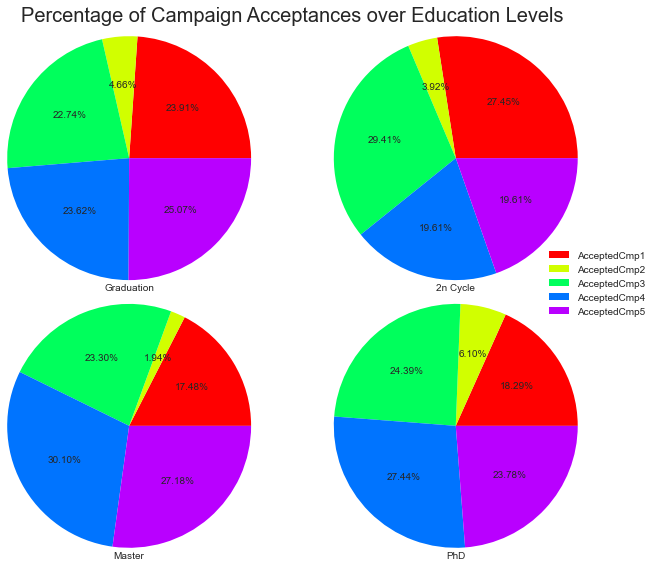

In [76]:
plot = 0
fig = plt.figure(figsize = (10,8))
theme = plt.get_cmap('hsv')
for i in range(4):
    i +=1
    plot += 1
    ax = plt.subplot(2,2,plot)
    ax.set_prop_cycle("color", [theme(1. * i / 5)
                             for i in range(5)])
    plt.pie(x = edu_camp_sum[edu_camp_sum.Education == edu_camp_sum.Education.unique()[i]].accepted,
            autopct='%.2f%%', 
            radius = 1.25)
    ax.set_xlabel(edu_camp_sum.Education.unique()[i], size = 10)
    
fig.legend(edu_camp_sum.campaign.unique(), loc = 'right', prop={'size': 10})
fig.suptitle('Percentage of Campaign Acceptances over Education Levels', size = 20)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Percentage of Campaign Acceptances over Education Levels')

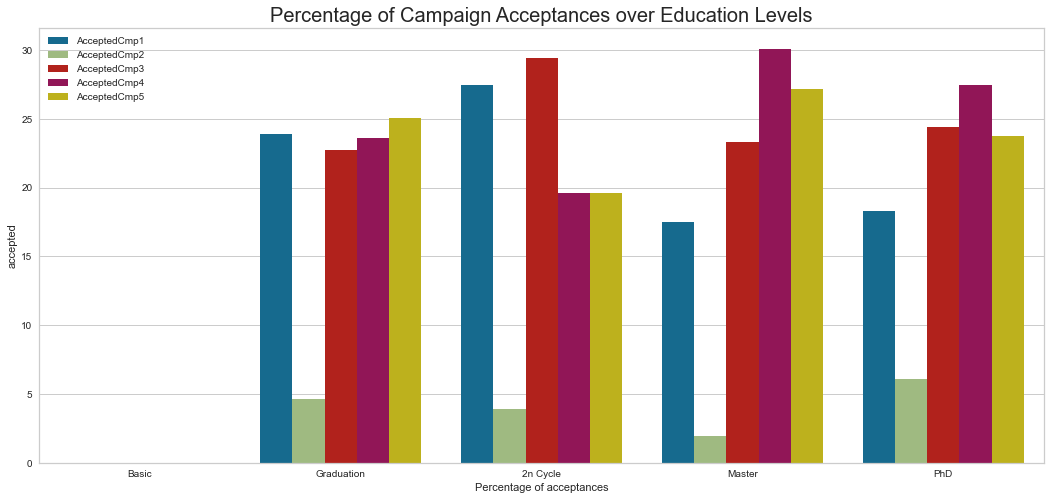

In [77]:
edu_camp_sum_percentage = edu_camp_melt.groupby(['Education','campaign'])\
                                        .agg({'accepted': 'sum'})\
                                        .sort_values(by =['Education','campaign'])\
                                        .groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
plt.figure(figsize = (18,8))
sns.barplot(data =edu_camp_sum_percentage[edu_camp_sum_percentage.Education != 'Basic'],
            x = 'Education',
            y = 'accepted',
            hue = 'campaign')
plt.xlabel('Percentage of acceptances')
plt.legend(loc = 'upper left')
plt.title('Percentage of Campaign Acceptances over Education Levels', size = 20)

* `2nd campaign` is the worst among others.
* `5st campaign` is prefered most by `Graduation` customers.
* `3st campaign` is the best for `2n Cycle Education`
* `Master` and `PhD` Customers are interested most with `4st campaign` but less with `1st campaign` in comparison with the other two.

#### Campaign versus Age Group

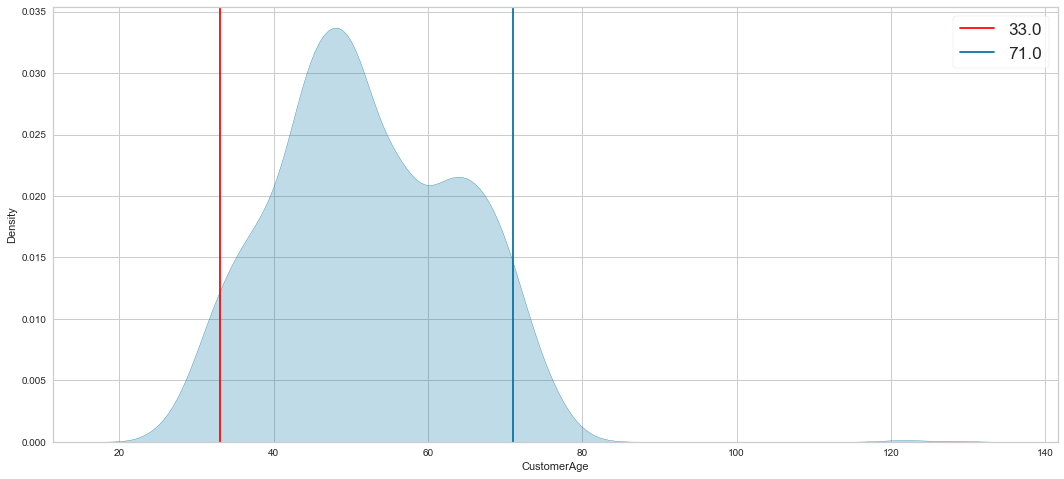

In [121]:
plt.figure(figsize =(18,8))
sns.kdeplot(data = df, x = 'CustomerAge', fill = True)
plt.axvline(df.CustomerAge.quantile(0.05),color = 'red', label = f'{df.CustomerAge.quantile(0.05)}')
plt.axvline(df.CustomerAge.quantile(0.95), label = f'{df.CustomerAge.quantile(0.95)}')
plt.legend(fontsize = 'xx-large', frameon = True)


This store's 90% Customers are in range of 33 to 71 years old.

Text(0.5, 1.0, 'Nomalized')

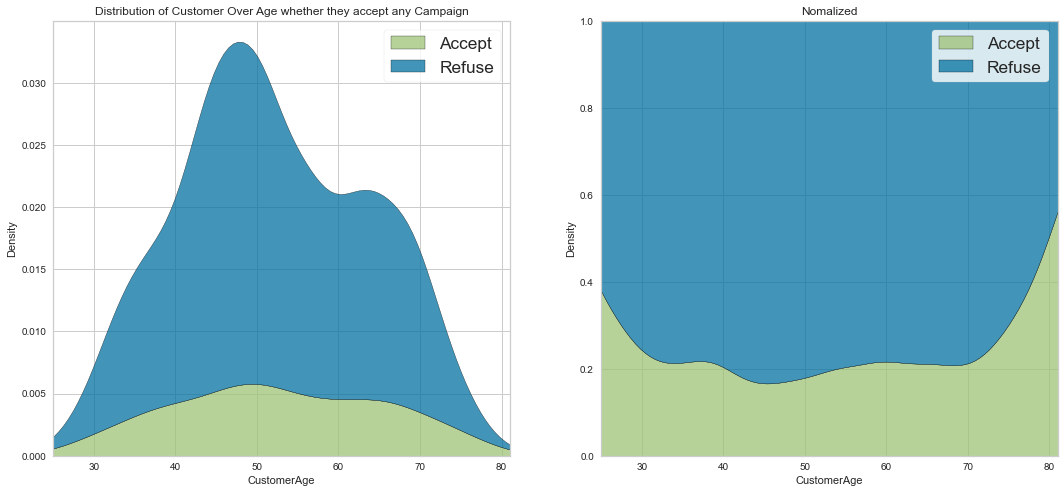

In [131]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize =(18,8))

sns.kdeplot(data = df, x = 'CustomerAge', hue = 'camp_accp', multiple = 'stack',ax = ax1)
ax1.set_xlim([df.CustomerAge.min(),81])
ax1.legend(labels = ['Accept', 'Refuse'], frameon = True, fontsize = 'xx-large')
ax1.set_title('Distribution of Customer Over Age whether they accept any Campaign')
sns.kdeplot(data = df, x = 'CustomerAge', hue = 'camp_accp', multiple = 'fill', ax = ax2)
ax2.set_xlim([df.CustomerAge.min(),81])
ax2.legend(labels = ['Accept', 'Refuse'], frameon = True, fontsize = 'xx-large')
ax2.set_title('Nomalized')

The plots show some interesting findings:
* Number of Customers accepting any of Campaigns raises when `CustomerAge` raises. However, Number of Customers refusing raises even higher which means that in Normalized plot, most of Customers seem not to be interested with any of campaigns. Approximatly, there is 25% chance that this store main customer would accept at least one campaign.
* The 71 and older customers who make up 5% of this store Customers are likely to be attracted with some of the campaigns. 


In [80]:
age_camp = df.groupby('age_group')[campaign].sum().reset_index()
age_camp

,age_group,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,18 to 35,18,9,25,20,3
1,36 to 50,78,52,57,46,8
2,51 to 70,57,90,62,63,19
3,71 and Older,10,16,19,15,0


Text(0.5, 1.0, 'Number of Customer over Age group whether they accept any Campaign')

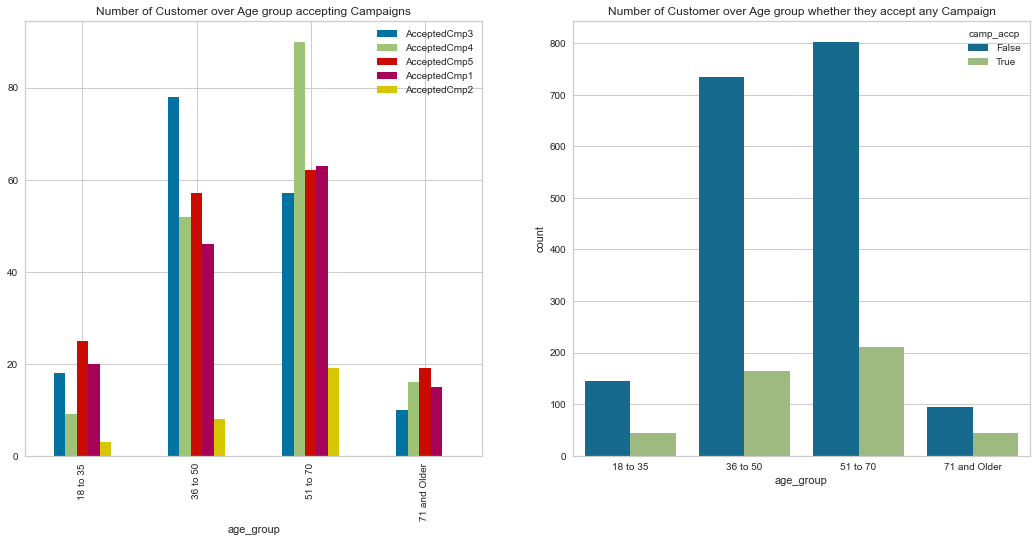

In [123]:
age_camp = df.groupby('age_group')[campaign].sum().reset_index()
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18,8))
age_camp.plot(x = 'age_group', y = campaign, kind = 'bar', ax = ax1)
ax1.set_title('Number of Customer over Age group accepting Campaigns')
sns.countplot(data = df, x = 'age_group',hue = 'camp_accp', order = np.sort(df.age_group.unique()),ax = ax2)
ax2.set_title('Number of Customer over Age group whether they accept any Campaign')

In the right plot, this store campaigns perform poorly because of significant refusing campaign rate.
Next, I'll look at performance of each campaign. In the left plot:
* `18 to 35` and `71 and older`are interested most with 5th and 1st campaign especially 5th.
* 4th campaign is mostly received by 36 older customers. Highest with customers in range `51 to 70`
* 3rd campaign got attention of Customer in range `36 to 50`
* 2nd campaign is the most underperforming one because it small accepting rate in comparison with the others. `71 and older` Customers haven't even accepted it for once.



#### Campaigns versus Income

<AxesSubplot:xlabel='income_group', ylabel='count'>

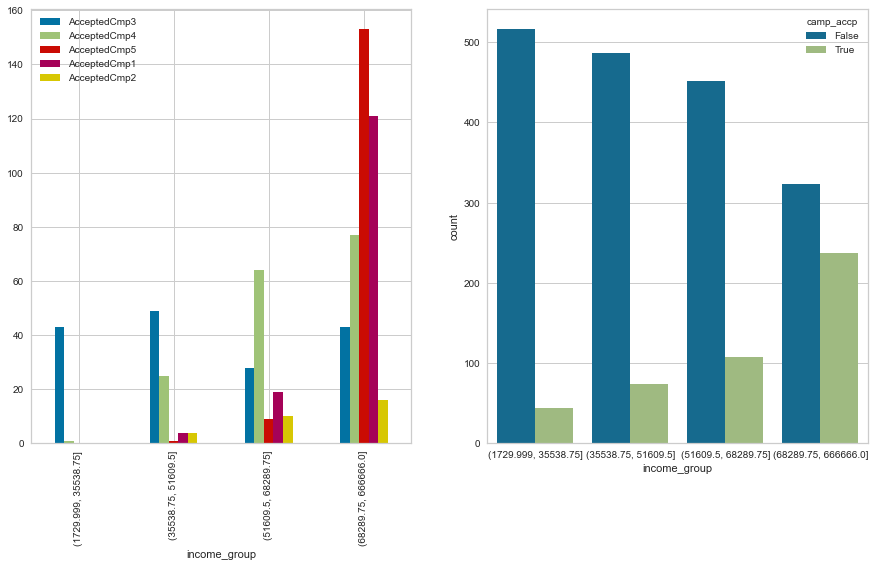

In [82]:
income_camp = df.groupby('income_group')[campaign].sum().reset_index()
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
income_camp.plot(x = 'income_group', y = campaign, kind = 'bar', ax = ax1)
sns.countplot(data = df, x = 'income_group', hue = 'camp_accp', ax = ax2)

The fact that I divided four equal size group of income, number of acceptances seemed to correlate with Income which means at next step I will run pointbiserial correlation test to find out whether there is any association between them.
There are some findings:
* Customers with lowest Income don't show any interest with the Campaign except the 3rd but not to high.
* In fact, the 3rd campaign performs really good and steady over Income group.
* The 1st, 4th, 5th campaigns gradually gain attention when Income goes up. Especially 5th and 1st are well recieved by highest Income customers.
* The 2nd campaign shows slowly increase in accepting rate over income group.

#### Point Biserial correlation between Campaign acceptance vs Income

In [84]:
levene(df.Income[df.camp_accp == False], 
       df.Income[df.camp_accp == True]) # same variance Income between samples of accept and refuse 

LeveneResult(statistic=0.1142385087468498, pvalue=0.7354010102252841)

In [83]:
pointbiserialr(x = df.camp_accp, y = df.Income) # r = 0.26 is very weak 

PointbiserialrResult(correlation=0.26274969663124553, pvalue=1.0965071746562583e-36)

# Conclustion

### Overview

#### Purchase Behavior:
    -	Strong relationship between number of purchases and Income. Customer with higher income tend to spend more in this store.
    -	Among channels, there are different performances.
    -	Among Age groups, purchase behavior is different.

        *Keys to drive Purchases: 
    -	Making more attention to wealthy Customers.
    -	Catalog is underperforming. It’s in need of changing.
    -	Channel should be specialized to age and income groups. Therefore, segmenting customers of marketing may help.

#### Campaign performances:
    -	Overall, the store’s campaigns are all underperforming.
    -	Among Education Levels and Age groups, Campaign are different performances.
    -	Higher Income customer tend to be interested with the campaigns. Especially fifth campaign.

        *Keys to efficient Campaigns :
    -	Sadly, it’s important to replace all campaigns or at least the second campaign.
    -	More specification on targeting customer especially Age and Education.


### Further analyses

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
* Amount of Products
* Results from existing marketing campaings
* Geographical data
* Customer marital status
* Customer complaints
